# Unsupervised Learning Homework

In this notebook you'll deepen your understanding of the unsupervised techniques we've presented with additional material and exercises.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from mpl_toolkits.mplot3d import Axes3D


## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Clustering 

Let's start by showing one way we can choose the "correct" number of clusters.

### $k$ Means "Elbow Method"

Remember that the main idea behind $k$ means clustering is that at each step the algorithm looks to minimize inertia. Where inertia is calculated:
$$
W = \sum_{i=1}^k \sum_{x_j \in \text{cluster } i} \text{dist}(x_j,c_i)^2
$$
where here $c_i$ is the centroid of cluster $i$.

The Elbow Method plots the inertia from the output of the algorithm versus the number of clusters. You then look to identify an "elbow" in the curve much like in the explained variance curve from PCA. The elbow is a point at which increasing the number of clusters give diminishing returns in decreasing inertia.

I'll show you how to implement it, then you'll need to implement it on a subset of the MNIST data.

In [2]:
# We saw this in Notebook 1
np.random.seed(614)
X = np.concatenate([[-2,-2] + 1.7*np.random.randn(100,2),
                   [2,2] + 1.7*np.random.randn(100,2)])

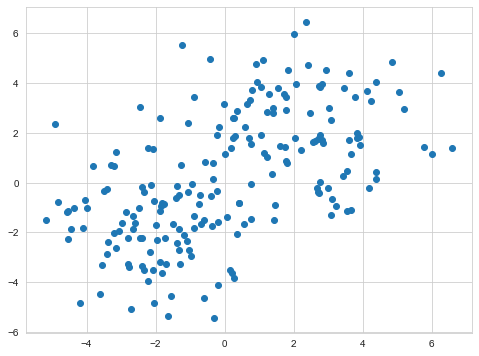

In [3]:
plt.figure(figsize=(8,6))

plt.scatter(X[:,0],X[:,1])

plt.show()

In [4]:
# the function is stored in sklearn.cluster
from sklearn.cluster import KMeans

In [5]:
# This function takes in the data in the cluster
# and the cluster's centroid
# then calculates the distance to the centroid
def get_dist_to_cent(X,centroid):
    return np.sum(np.sum(np.power(X - centroid,2),axis=1))

In [6]:
W = []

# for i in 1 to 101
for i in range(1,21):
    # make a kmeans
    kmeans = KMeans(i)

    # fit the data
    kmeans.fit(X)
    
    # get the cluster
    clusters = kmeans.predict(X)

    # a holder
    temp = 0
    # for each cluster
    for j in np.unique(clusters):
        # get the centroid
        j_centroid = kmeans.cluster_centers_[j]
        # Add the inertia contribution from the centroid
        temp = temp + get_dist_to_cent(X[clusters ==j,:],j_centroid)
        
    # append the inertia to W
    W.append(temp)

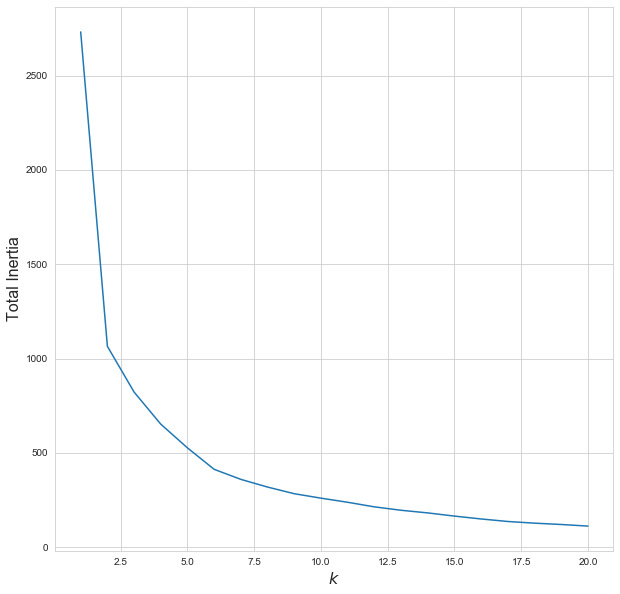

In [7]:
plt.figure(figsize=(10,10))

plt.plot(range(1,21), W)

plt.xlabel("$k$", fontsize=16)
plt.ylabel("Total Inertia", fontsize=16)


plt.show()

The elbow is where the rate of decrease in Total Inertia considerably shows. For this data it appears that the elbow is one of $2$, $3$, or $4$.

Now it's your turn.

In [8]:
# try this first
X = pd.read_csv("https://raw.githubusercontent.com/cerndb/dist-keras/master/examples/data/mnist.csv")

y = np.array(X.iloc[:,0])
X = np.array(X.iloc[:,1:])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_subset,X2,y_subset,y2 = train_test_split(X,y,shuffle=True,stratify=y,random_state=440,train_size=2000)

del X2, y2

Run the `X_subset` data through the elbow method approach. Note we only subset the data here as a way to decrease the run time. What appears to be the "correct" number of clusters for this data set.

In [11]:
## Code here





In [12]:
## Code here





In [13]:
## Code here





In [14]:
## Code here





In [15]:
## Code here





In [16]:
## Code here





There are additional techniques for choosing a good number of clusters. I encourage you to read through this reference, <a href="https://uc-r.github.io/kmeans_clustering">https://uc-r.github.io/kmeans_clustering</a>, while the code is in R the concepts are language agnostic. For a package that implements these techniques in python see this package <a href="https://www.scikit-yb.org/en/latest/api/cluster/index.html">https://www.scikit-yb.org/en/latest/api/cluster/index.html</a>.

### Hierarchical Clustering Inconsistency

Hierarchical clustering also has a technique in which it attempts to identify the "natural" clustering of the data set. We'll describe the approach from page 11-11 on this file <a href="http://cda.psych.uiuc.edu/multivariate_fall_2013/matlab_help/cluster_analysis.pdf">http://cda.psych.uiuc.edu/multivariate_fall_2013/matlab_help/cluster_analysis.pdf</a>.

To help explain lets return to this example from Unsupervised Learning Notebook 1.

In [17]:
np.random.seed(440)
X = np.random.random((5,2))

In [18]:
# This is where the functions are stored
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [19]:
# You input the data
# then tell the method how you want measure
# closeness
# here I've chose 'centroid'
Z = linkage(X, 'centroid')

# Z returns an array it is called a linkage vector
# I'll use a dataframe to examine it
# it returns four columns
# that I'll describe below
pd.DataFrame(Z,columns = ['cluster_1','cluster_2','distance','new_cluster_size'])

,cluster_1,cluster_2,distance,new_cluster_size
0,3.0,4.0,0.246761,2.0
1,1.0,2.0,0.326850,2.0
2,5.0,6.0,0.548826,4.0
3,0.0,7.0,0.681749,5.0


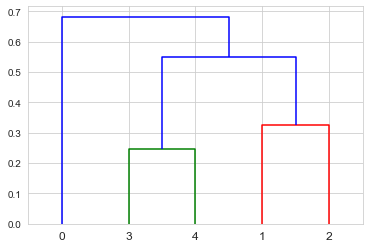

In [20]:
# I can plot the dendrogram like so
# I input a linkage vector
dendrogram(Z)

plt.show()

When two cluster join in a horizontal line we can call this a link. 

Here I've taken the picture and circled the links
<img src="DendrogramLinks.png" style="width:60%"></img>

We say that links are <i>consistent</i> if they form at close to the same distance. We say that links are <i>inconsistent</i> if they occur further distances. So in this example the red and and green links appear to be consistent while the blue links appear to be inconsistent with both the red and green links.

This notion of inconsistency can then be leveraged to look for a "natural" clustering of the data. This is why the dendrogram is colored blue green and red.

In `scipy` we can get that natural split using the `fcluster` command with `criterion=inconsistent`

In [21]:
fcluster(Z,t=.4,criterion='inconsistent')

array([3, 2, 2, 1, 1], dtype=int32)

For the `criterion=inconsistent` version of the algorithm the `t` has a different meaning. You can read what it is from this excerpt of the `fcluster` docs.
<img src="fclusterDocs.png" style="width:80%"></img>

`scipy` includes an additional function `inconsistent`. Read through page 11-13 of the linked notes and learn how to implement it by reading the docs, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.inconsistent.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.inconsistent.html</a>

In [22]:
## Code here





In [23]:
## Code here





In [24]:
## Code here





In [25]:
## Code here





What is the natural clustering for this data? Look at the inconsistency table.

In [26]:
np.random.seed(614)
X = np.concatenate([[-2,-2] + 1.7*np.random.randn(100,2),
                   [2,2] + 1.7*np.random.randn(100,2)])

In [27]:
## Code here





In [28]:
## Code here





In [29]:
## Code here





In [30]:
## Code here





In [31]:
## Code here





In [32]:
## Code here





In [33]:
## Code here





An additional resource on inconsistency that may be useful are these notes from Northwestern, <a href="http://www.ece.northwestern.edu/local-apps/matlabhelp/toolbox/stats/multiv15.html">http://www.ece.northwestern.edu/local-apps/matlabhelp/toolbox/stats/multiv15.html</a>.

### MNIST Clustering

We noticed some interesting clustering of the MNIST data set. Let's revisit that. One of your classmates pointed out that her clustering of these digits gave this weird cluster:

<b>Cluster 2</b>

Digit - Number of Observations

4  -  2279

9  -  2115

7  - 1310


Now why would that be?

Rerun Clustering on the real MNIST data set.

Look in your results for a weird cluster like the one produced by your classmate. Then look at the digits within the cluster as images. Can you identify any reasons as to why the algorithm grouped these seemingly different numbers together?

In [34]:
## Code here





In [35]:
## Code here





In [36]:
## Code here





In [37]:
## Code here





In [38]:
## Code here





In [39]:
## Code here





In [40]:
## Code here





## Dimensionality Reduction

### Pearson's Original Formulation of PCA

Karl Pearson's 1903 paper, <a href = "https://www.tandfonline.com/doi/abs/10.1080/14786440109462720"><i>On lines and planes of closest fit to systems of points in space</i></a>, was the original introduction of PCA.

In this paper Pearson contemplated what we mean by line (or plane) of best fit. In regression the approach is to find the line of best fit by minimizing the distance between the estimate, $\hat{y}$, and the actual value, $y$. Pearson wondered what if instead we considered minimizing the distance between the data points and the hyperplane fit to those points.

Consider this image from Pearson's 1903 paper.

<img src = "PearsonLine.png" width = "500"></img>

It turns out that this formulation is equivalent to maximizing the variance.


Read through page 352 here, <a href="https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf">https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf</a> for a derivation of that fact.

### The Relationship of PCA to SVD

Recall that the PCA component vectors are given by the eigenvectors of $\Sigma$, the covariance matrix of the data matrix $X$, where the columns of $X$ have all been centered at $0$.

Any covariance matrix is symmetric, and thus is diagonalizable. So $\Sigma = Q^T \Lambda Q$ for some matrix $Q$. 

In a potential abuse of notation let $X = U \sigma V^T$ be the singular value decomposition of $X$.

Now recall that the sample covariance matrix can be computed as $X^T X$.

Recalculate $X^T X$ substituting in the SVD of $X$, what do you find? Hint: $V$ is orthonormal.


###### Spoiler Below




<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

It is actually much safer to calculate the SVD of $X$ rather than find the eigenvectors of $X^T X$, and this is what `sklearn` does.


### PCA Handle Multicolinearity

Here's a very simple example of how PCA can be helpful in regression tasks.

In [41]:
X = np.zeros((1000,2))

X[:,0] = 4*np.random.randn(1000)
X[:,1] = 2*X[:,0] + np.random.randn(1000)

y = X[:,0] + 12 + X[:,1] + 1.5*np.random.randn(1000)

In [42]:
df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'y':y})

Examine `df` for multicolinearity.

Then apply PCA to `X` using 2 components. Add the PCA transformed `X` as new columns of `df`.

Examine those columns for multicolinearity and their relationship with `y`.

What do you notice?

In [43]:
## Code here





In [44]:
## Code here





In [45]:
## Code here





In [46]:
## Code here





In [47]:
## Code here





In [48]:
## Code here





### Extensions of PCA

We now survey various extensions of PCA and provide why they're useful.

#### Sparse PCA

Think of this as the Lasso Regression of PCA techniques <a href="https://en.wikipedia.org/wiki/Sparse_PCA">https://en.wikipedia.org/wiki/Sparse_PCA</a>.

In this setting you're maximizing the variance along the project $w$ while using these new constraints, $||w||_2^2 = 1$ and $||w||_0 < k$, where $k$ is chosen ahead of time and $||w||_0 = |w_1|^0 + |w_2|^0 + \dots + |w_m|^0$

The idea here is that similar to the issue with ridge regression the components of normal PCA tend to have nonzero entries for all of the $m$ features. Like with Lasso the $||w||_0 < k$ constraint forces some number of them to be $0$.

This can be implemented with `SparsePCA` in `sklearn`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html">https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html</a>.

Return to the faces example in notebook 5. Does anything change if you use `SparsePCA` instead of `PCA`? I genuinely don't know what will happen but I'm curious.

In [49]:
## Code here





In [50]:
## Code here





In [51]:
## Code here





In [52]:
## Code here





In [53]:
## Code here





In [54]:
## Code here





In [55]:
## Code here





In [56]:
## Code here





#### Randomized PCA

This version of PCA takes advantage of randomization in order to make low order PCA projects much faster on very high dimensional data. Here is the paper where it was introduced <a href="https://arxiv.org/abs/0909.4061">https://arxiv.org/abs/0909.4061</a>.

You can implement this with `PCA(svd_solver="randomized")`.

We haven't worked with data sets large enough to necesitate its use, but you should be aware of its existence.

#### Kernel PCA

Kernel PCA is PCA that is able to utilize the kernel trick from support vector machines, <a href="https://en.wikipedia.org/wiki/Kernel_principal_component_analysis">https://en.wikipedia.org/wiki/Kernel_principal_component_analysis</a>.

The idea is, once again, to lift our data into a higher dimensional space (typically a Hilbert space) and then perform PCA up there, then bring it back down to lower dimensions. Where we utilize the kernel trick as a way to avoid the higher dimensional space all together.

We can use this on data sets where typical PCA may fail to some success.

Let's return to the HELLO data from notebook 4.

In [57]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]


In [58]:
# Make our data
X = make_hello(1000)

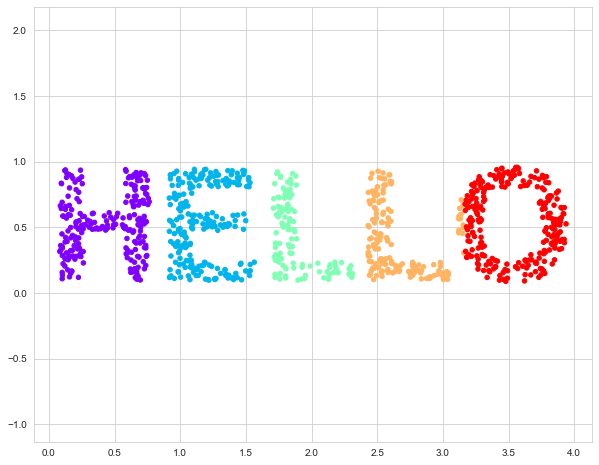

In [59]:
# Plot it in 2D
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5), s = 20)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')

plt.show()

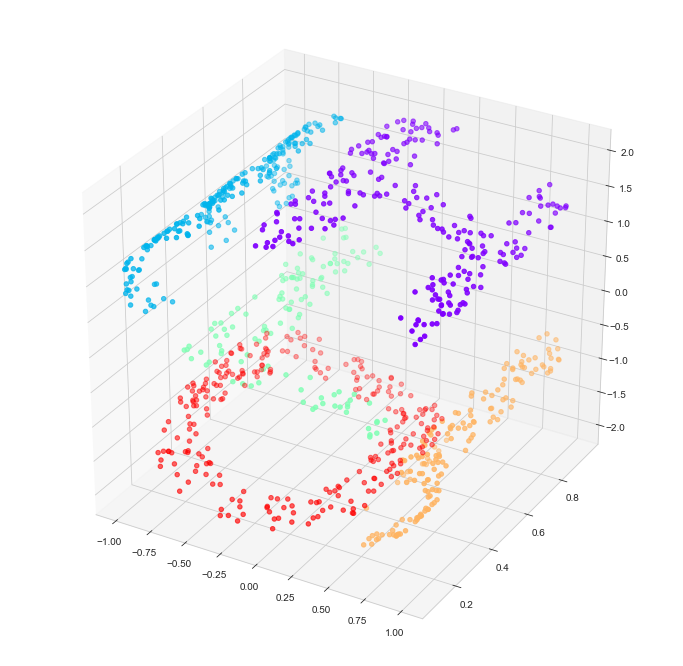

In [60]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

plt.figure(figsize=(12,12))

ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

Use PCA on the `XS` data.

In [61]:
## Code here





In [62]:
## Code here





In [63]:
## Code here





In [64]:
## Code here





In [65]:
## Code here





Now try `KernelPCA` from `sklearn` using different kernel functions <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html">https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html</a>, does it perform any better?

### PCA on Political Data

#### Senator Votes

Here's a fun example using some political data. Note you'll need to unzip this data first, it is stored in roll_calls.zip.

Read in this data set.

In [66]:
congress_112 = pd.read_csv("Senate_112_roll_mat.csv")

congress_112.loc[congress_112.party_code == 200, "party_code"] = "Republican"
congress_112.loc[congress_112.party_code == 100, "party_code"] = "Democrat"
congress_112.loc[congress_112.party_code == 328, "party_code"] = "Independent"

congress_112.head()

,name,icpsr,party_code,1,2,3,4,5,6,7,...,477,478,479,480,481,482,483,484,485,486
0,"COCHRAN, William Thad",14009,Republican,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
1,"BAUCUS, Max Sieben",14203,Democrat,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0
2,"GRASSLEY, Charles Ernest",14226,Republican,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
3,"HARKIN, Thomas Richard (Tom)",14230,Democrat,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0
4,"LEAHY, Patrick Joseph",14307,Democrat,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,0.0,1.0,1.0


This contains votes for every senator from the 112th Congress. Each row is a senator and each column to the right after `party_code` is a roll call vote conducted in the Senate.

Run the votes through PCA, project down to 2 dimensions. Plot the results, what do you notice?

In [67]:
## Code here





In [68]:
## Code here





In [69]:
## Code here





In [70]:
## Code here





In [71]:
## Code here





In [72]:
## Code here





Do the same for the 113th, 114th, and 115th senates.

In [73]:
## Code here





In [74]:
## Code here





In [75]:
## Code here





In [76]:
## Code here





In [77]:
## Code here





#### Twitter Polarization

A great fear of social media is that it is leading to greater polarization of our society, but what does this have to do with PCA?

Well lets look at a data set collected by the Center for the Study of Networks and Society (CSNS). For a <a href = "http://www.susanbourbaki.com/category/breitbart/">blog post</a> back in 2017 in which they examined the following habits of various Twitter users they collected every follower from the following 30 accounts: DrDavidDuke, AryanBrother, CofCC76, Hatchet318, KKKOfficial311, KeyStoneUnited, MatthewHeimbach, ThaRightStuff, nsm88, BreitbartNews, FiveThirtyEight, csmonitor, MotherJones, NRO, dailykos, theblaze, thenation, DRUDGE_REPORT, WSJ, washingtonpost, FoxNews, NPR, realDonaldTrump, tedcruz, BernieSanders, SenWarren, SpeakerRyan, SenJohnMcCain, marcorubio, and CoryBooker.

Now we will depart from the story told by CSNS and look at a specific subset of their data, just those followers of the 13 media accounts: BreitbartNews, FiveThirtyEight, csmonitor, MotherJones, NRO, dailykos, theblaze, thenation, DRUDGE_REPORT, WSJ, washingtonpost, FoxNews, NPR. However, I encourage you to read their blog post as well as their recent paper on arxiv, <a href = "https://arxiv.org/pdf/1905.07755.pdf"><i>Online reactions to the 2017 ‘Unite the Right’ rally in Charlottesville: Measuring polarization in Twitter networks using media followership</i></a> that includes a more in depth analysis of this data in the context of the Charlottesville incident.

Our goal will be to see if PCA can illuminate any information on the anonymized Twitter users based on their media account followership. One more additional caveat before we move forward, the original media restricted dataset contains 27,056,206 unique Twitter accounts. We will only look at a stratified sample of this data that contains only 100,000 accounts. The data has been sampled in such a way that we retain the results found by CSNS.

In [78]:
# Load the data
twitter = pd.read_csv("twitter_sba.csv")

twitter.head()

,node,BreitbartNews,FiveThirtyEight,csmonitor,MotherJones,NRO,dailykos,theblaze,thenation,DRUDGE_REPORT,WSJ,washingtonpost,FoxNews,NPR
0,144,0,1,0,0,0,0,0,0,0,0,0,0,0
1,222,0,1,0,0,0,0,0,0,0,0,0,0,1
2,233,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1192,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1898,0,1,0,0,0,0,0,0,0,0,0,0,0


Now before performing PCA let's look at the believed political leanings of each of our media accounts.

| Twitter Screenname | News Source               | Leaning Tendency |
|--------------------|---------------------------|------------------|
| FoxNews            | Fox News                  | Right            |
| BreitbartNews      | Breitbart                 | Right            |
| DRUDGE_REPORT      | The Drudge Report         | Right            |
| the blaze          | TheBlaze                  | Right            |
| NRO                | National Review           | Right            |
| WSJ                | Wall Street Journal       | center           |
| csmonitor          | Christian Science Monitor | left             |
| FiveThirtyEight    | FiveThirtyEight           | left             |
| dailykos           | Daily KOS                 | left             |
| thenation          | The Nation                | left             |
| MotherJones        | Mother Jones              | left             |
| washingtonpost     | The Washington Post       | left             |
| NPR                | NPR                       | left             |

These tendencies have been corroborated by peer reviewed studies. The Wall Street Journal is labeled as center because it is widely considered to be conservative-leaning, but has been grouped as liberal based on readership and co-citations.

Run this data through PCA. Look at the principal component vectors, what do you notice?

In [84]:
## Code here





In [84]:
## Code here





In [84]:
## Code here





In [84]:
## Code here





In [84]:
## Code here





In [84]:
## Code here





In [84]:
## Code here





In [84]:
## Code here





## Manifold Learning

### tSNE Blobs

Look at this data

In [79]:
# First blob
A = np.random.normal(scale = 1, size = (300,3))

# The blob that surrounds A
B = np.array([x for x in np.random.normal(scale = 5, size = (1000,3)) if np.linalg.norm(x) > 7])

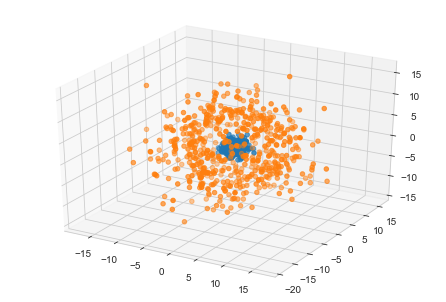

In [80]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(A[:,0], A[:,1], A[:,2])
ax.scatter(B[:,0], B[:,1], B[:,2])

plt.show()

In [81]:
# Combine all the data
X = np.r_[A,B]

Run `X` through PCA and plot in 2D. Then run `X` through tSNE and plot in 2D. Which is better at separating the points?

### Movies

From the following kaggle data set, https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset/downloads/imdb-5000-movie-dataset.zip/1, I extracted the movie name and the genres. From that data I created the following dataframe.

In [82]:
movies = pd.read_csv("movies.csv")

In [83]:
movies.head()

,movie_title,genres,Action,Adventure,Fantasy,Sci-Fi,Thriller,Documentary,Romance,Animation,...,Crime,Horror,War,Biography,Music,Game-Show,Reality-TV,News,Short,Film-Noir
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,Action|Adventure|Thriller,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,Action|Thriller,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 26 possible genres, and for each genre column there is a 0 or 1 depending on whether or not that movie was classified as that genre.

Using different manifold learning techniques explore if there are natural genre groupings that many films fall into. You could look at single genres like Documentary, or combinations like Fantasy Adventure. Consider adding a binary variable for a film series like Star Wars, do those films go to the same place in the plot?

There are no right or wrong answers here, just have fun exploring the data!

In [84]:
## Code here





In [85]:
## Code here





In [86]:
## Code here





In [87]:
## Code here





In [88]:
## Code here





In [89]:
## Code here





In [90]:
## Code here





In [91]:
## Code here



